# 1. Introduction and System Requirements

## 1.1 Problem Statement

The researcher faces a significant imbalanced classification challenge with the following characteristics:
- Dataset size: ~1 million rows
- Feature space: 30 features
- Class distribution: Highly imbalanced (97% negative, 3% positive)

This imbalance represents a fundamental systems challenge that affects all aspects of the machine learning pipeline. When positive examples are rare, standard training approaches often produce models that simply predict the majority class, achieving high accuracy but failing to identify the minority class cases of interest.

A systematic approach is required because this problem impacts:
1. Data preprocessing and sampling strategies
2. Model architecture and learning dynamics
3. Evaluation metrics and validation approaches
4. Infrastructure requirements and computational efficiency

Below is a visualization of the class imbalance that illustrates the magnitude of the challenge:

### Why Deep Learning is Appropriate but Challenging

Deep learning offers several advantages for this classification problem:
- Ability to autmomatically learn complex patterns from high-dimensional data
- Capacity to process large datasets efficiently with proper infrastructure
- Flexibility in architecture design to address specific challenges
- Strong performance on similar classification tasks when properly configured

However, deep learning presents unique challenges with imbalanced data:
- Neural networks tend to bias toward majority class during training
- Optimization can converge to local minima that ignore minority class
- Traditional loss functions may not adequately penalize minority class errors
- Requires careful design of architecture, loss functions, and training procedures

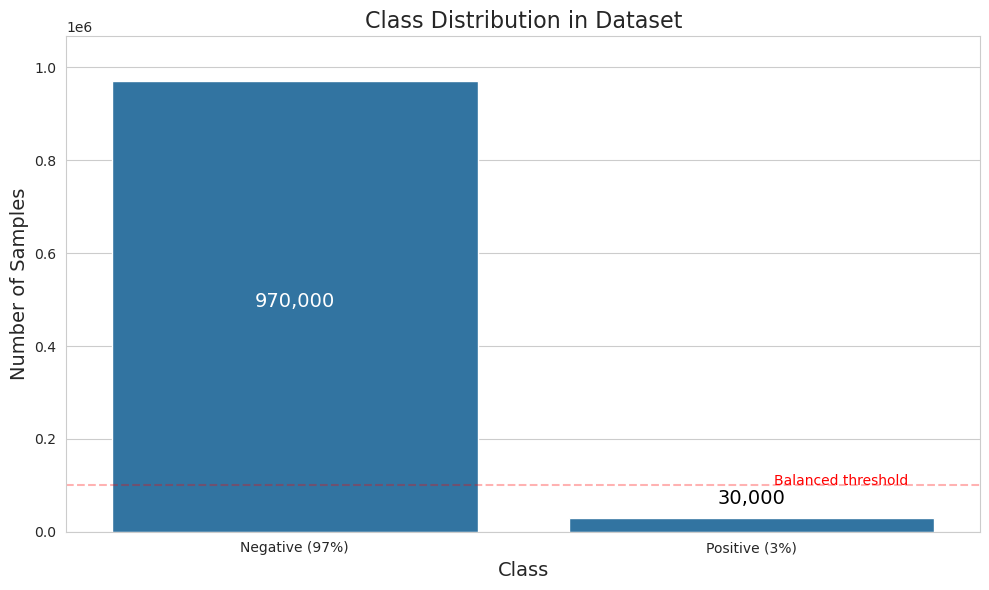

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Sample data reflecting the class imbalance
class_counts = [970000, 30000]  # 97% negative, 3% positive
class_names = ['Negative (97%)', 'Positive (3%)']

# Create visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution in Dataset', fontsize=16)
plt.ylabel('Number of Samples', fontsize=14)
plt.xlabel('Class', fontsize=14)

# Add text annotations - adjusted for visibility
plt.text(0, class_counts[0]/2, f'{class_counts[0]:,}', ha='center', fontsize=14, color='white')
plt.text(1, class_counts[1] + 30000, f'{class_counts[1]:,}', ha='center', fontsize=14, color='black')

# Add a horizontal line to emphasize the imbalance
plt.axhline(y=100000, color='red', linestyle='--', alpha=0.3)
plt.text(1.05, 100000, 'Balanced threshold', color='red')

# Adjust y-axis to make sure all elements are visible
plt.ylim(0, 1.1 * max(class_counts))

plt.tight_layout()
plt.show()

## 1.2 Requirements Analysis

### Functional Requirements
- Address classification with severe class imbalance (3% positive clss)
- Support deep learning approaches for the classification task
- Process large-scale dataset (~1M rows with 30 features)
- Enable effective identification of minority class instances
- Provide framework for model development and evaluation

### Performance Requirements
- Balance model performance metrics against the class imbalance challenge
- Optimize for appropriate evaluation metrics beyond simple accuracy
- Ensure computational efficiency for handling the large dataset size
- Support iterative experimentation and model refinement
- Maintain performance with scalable approaches as dataset grows

### Stakeholder Considerations
- Researcher with deep learning interest but limited experience in implementation
- Need for guidance on starting points for model development
- Requirements for reproducible research methodology
- Data handling needs for the class imbalance problem
- Workflow integration for research context

## 1.3 System Constraints and Considerations

### Technical Constraints
- Dataset size (~1M rows) requires efficient data processing strategies
- 30-dimensional feature space may present challenges for visualization and interpretation
- Severe class imbalance (3% positive) impacts model training dynamics
- Computing resources must be suitable for deep learning with large datasets

### Design Considerations for Class Imbalance
- Sampling approaches to address the 97%/3% class distribution
- Loss function selection to properly weight minority class examples
- Feature engineering impact on class separability
- Model architecture implications for imbalanced learning

### Reproducibility Requirements
- Experiment tracking and version control for models and data
- Documentation of preprocessing steps and hyperparameters
- Validation strategy appropriate for imbalanced data
- Consistent evaluation framework across iterations

### Research Workflow Integration
- Integration with existing data analysis pipelines
- Compatibility with research reporting requirements
- Support for iterative exploration and experimentation
- Knowledge transfer potential for similar imbalanced problems

Accuracy: 0.970
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


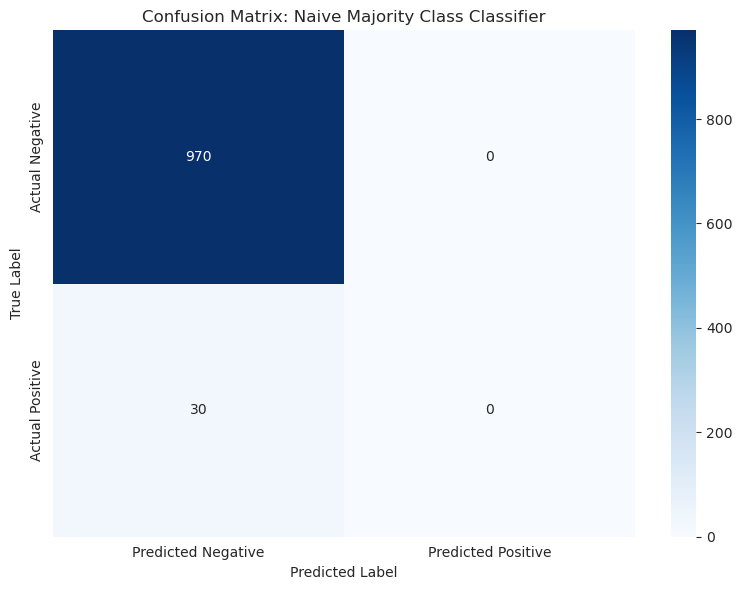

In [29]:
# Demonstrating why accuracy is misleading for imbalanced classification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a naive classifier that always predicts the majority class
y_true = np.array([0] * 970 + [1] * 30)  # 1000 samples with 3% positive class
y_pred_naive = np.zeros(1000)  # Always predict majority class

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_naive)
precision = precision_score(y_true, y_pred_naive, zero_division=0)
recall = recall_score(y_true, y_pred_naive)
f1 = f1_score(y_true, y_pred_naive, zero_division=0)

# Display results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Visualize confusion matrix
cm = confusion_matrix(y_true, y_pred_naive)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix: Naive Majority Class Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### Imbalanced Classification Metrics Legend

- **Accuracy**: Proportion of correct predictions (TP+TN)/(TP+TN+FP+FN); misleading for imbalanced data as predicting all majority class can give high accuracy
- **Precision**: Proportion of true positives among positive predictions TP/(TP+FP); measures how many predicted positives are actually positive
- **Recall**: Proportion of true positives identified TP/(TP+FN); measures how many actual positives are correctly identified
- **F1 Score**: Harmonic mean of precision and recall; balances the trade-off between precision and recall
- **Confusion Matrix**: Table showing predicted vs. actual class assignments:
  - True Positive (TP): Correctly predicted positive class
  - False Positive (FP): Incorrectly predicted positive class
  - True Negative (TN): Correctly predicted negative class
  - False Negative (FN): Incorrectly predicted negative class

# 2. Data Processing Subsystem

This section outlines the architectural approach for processing the imbalanced dataset (~1M rows, 30 features, 3% positive class). The design addresses three key challenges: handling the class imbalance, ensuring scalability for the large dataset, and maintaining reproducibility throughout the data pipeline.

## 2.1 Data Flow Architecture

The data processing subsystem requires an architecture that can efficiently handle large-scale imbalanced data while ensuring reproducibility. The proposed design adopts a modular pipeline approach with specialized components for addressing class imbalance.

Key architectural components include:

1. **Data Ingestion Layer**: Handles initial data loading, validation, and partitioning
2. **Preprocessing Engine**: Performs standard preprocessing operations (normalization, missing value handling)
3. **Imbalance Handler**: Specialized component implementing multiple strategies for class imbalance
4. **Feature Transformation Module**: Prepares final features for model consumption
5. **Data Versioning System**: Cross-cutting concern tracking transformations for reproducibility

This architecture emphasizes:
- **Modularity**: Independent components with clear interfaces
- **Scalability**: Partition-based processing for handling 1M+ rows
- **Reproducibility**: Versioning and parameter tracking throughout the pipeline
- **Flexibility**: Configurable imbalance handling to support experimentation

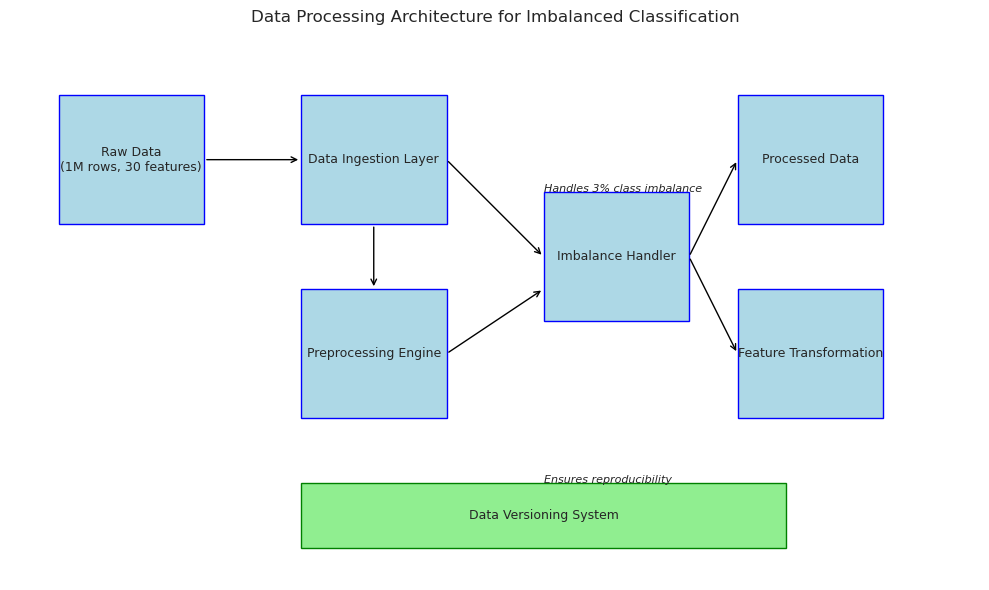

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a clean figure with plenty of space
fig, ax = plt.subplots(figsize=(10, 6))

# Component definitions with adjusted positions
components = [
    {"name": "Raw Data\n(1M rows, 30 features)", "position": [0.05, 0.55, 0.15, 0.2]},
    {"name": "Data Ingestion Layer", "position": [0.3, 0.55, 0.15, 0.2]},
    {"name": "Preprocessing Engine", "position": [0.3, 0.25, 0.15, 0.2]},
    {"name": "Imbalance Handler", "position": [0.55, 0.4, 0.15, 0.2]},
    {"name": "Feature Transformation", "position": [0.75, 0.25, 0.15, 0.2]},
    {"name": "Processed Data", "position": [0.75, 0.55, 0.15, 0.2]}
]

# Versioning component
versioning = {"name": "Data Versioning System", "position": [0.3, 0.05, 0.5, 0.1]}

# Draw each component box
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=9)

# Draw the versioning box
x, y, w, h = versioning["position"]
rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='green', facecolor='lightgreen')
ax.add_patch(rect)
ax.text(x + w/2, y + h/2, versioning["name"], ha='center', va='center', fontsize=9)

# Define arrows using annotate for better control
arrows = [
    {"start": [0.2, 0.65], "end": [0.3, 0.65]},  # Raw to Ingest
    {"start": [0.375, 0.55], "end": [0.375, 0.45]},  # Ingest to Preprocess
    {"start": [0.45, 0.65], "end": [0.55, 0.5]},  # Ingest to Imbalance
    {"start": [0.45, 0.35], "end": [0.55, 0.45]},  # Preprocess to Imbalance
    {"start": [0.7, 0.5], "end": [0.75, 0.35]},  # Imbalance to Feature
    {"start": [0.7, 0.5], "end": [0.75, 0.65]},  # Imbalance to Processed
]

# Draw the arrows
for arrow in arrows:
    ax.annotate(
        '', xy=arrow["end"], xytext=arrow["start"],
        arrowprops=dict(arrowstyle='->', color='black')
    )

# Add title
plt.title('Data Processing Architecture for Imbalanced Classification', fontsize=12)

# Add minimal annotations
plt.text(0.55, 0.6, "Handles 3% class imbalance", fontsize=8, style='italic')
plt.text(0.55, 0.15, "Ensures reproducibility", fontsize=8, style='italic')

# Clean up the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.85)
ax.axis('off')

# Apply tight layout
plt.tight_layout()
plt.show()


## 2.2 Imbalance Handling Strategy

Addressing the 3% positive class imbalance is critical for model performance. The system implements three complementary approaches that can be configured based on experimental needs:

### 1. Data-Level Approaches

These strategies directly modify the dataset distribution:

- **Undersampling**: Reduces majority class examples to create balanced training batches
  - *Benefits*: Reduces training time, focuses learning on decision boundary
  - *System Impact*: Requires less memory, enables faster iteration cycles
  - *Implementation*: Random or informed undersampling with configurable ratios

- **Oversampling**: Increases minority class representation through duplication or synthesis
  - *Benefits*: Preserves all majority class information
  - *System Impact*: Increased memory requirements, longer training time
  - *Implementation*: SMOTE and variants, with controllable neighborhood parameters

### 2. Algorithm-Level Approaches

These strategies adapt the learning process to handle imbalance:

- **Cost-Sensitive Learning**: Assigns higher misclassification costs to minority class
  - *Benefits*: Uses all data without modification
  - *System Impact*: Minimal preprocessing overhead, complexity shifts to model training
  - *Implementation*: Dynamic class weight calculation based on dataset statistics

### 3. Ensemble-Based Integration

Combines multiple models trained on different data distributions:

- *Benefits*: Improves robustness through diverse learning signals
- *System Impact*: Increased computational requirements, more complex inference
- *Implementation*: Parallel processing of differently sampled datasets, weighted voting

The system architecture allows these strategies to be applied individually or in combination, with parameters tracked through the versioning system for reproducibility.

## 2.3 Preprocessing Pipeline Design

The preprocessing pipeline is designed to handle the large-scale dataset efficiently while maintaining reproducibility. The architecture follows a modular design pattern that separates concerns and enables parallel processing where possible.

### Core Pipeline Components

1. **Data Validation Module**
   - Schema validation for 30-feature input
   - Statistical anomaly detection
   - Missing value identification
   - Ensures data quality before processing

2. **Feature Preprocessing Module**
   - Normalization/standardization for neural network optimization
   - Handling of missing values using configurable strategies
   - Outlier detection and treatment
   - Feature-specific transformations based on distribution analysis

3. **Feature Engineering Layer**
   - Automated feature interaction detection
   - Dimensionality reduction options (PCA, t-SNE)
   - Domain-specific transformations
   - Feature importance analysis to inform model design

### Scalability Considerations

- **Partitioned Processing**: Dataset is processed in configurable chunks to manage memory constraints
- **Caching Strategy**: Intermediate results cached to avoid redundant computation
- **Parallel Execution**: Independent transformations run concurrently where applicable
- **Resource Adaptation**: Processing scales based on available computational resources

### Reproducibility Framework

- **Parameter Tracking**: All preprocessing parameters are versioned and logged
- **Transformation Sequences**: Order of operations explicitly recorded
- **Random State Control**: Seed values fixed and documented for stochastic processes
- **Pipeline Serialization**: Complete pipeline state can be saved and restored
- **Execution Provenance**: Full history of data transformations maintained

This design enables efficient processing of the 1M rows while maintaining the ability to recreate exact preprocessing conditions for experimental validation and model deployment.

# 3. Model Development Framework

This section outlines a systematic approach to developing deep learning models for the imbalanced classification task, with specific focus on architecture selection, training system design, and parameter optimization strategies tailored to handle the class imbalance challenge.

## 3.1 Architecture Selection Methodology

When approaching imbalanced classification with tabular data, architecture selection requires a systematic methodology that addresses both the tabular nature of the data and the severe class imbalance challenge.

### Evaluation Framework for Architecture Selection

The proposed framework evaluates candidate architectures across dimensions specifically relevant to imbalanced classification:

1. **Feature Interaction Capability**: How well the architecture captures relationships between the 30 features
2. **Class Sensitivity**: Ability to learn from limited positive examples (3% class)
3. **Regularization Mechanisms**: Controls to prevent overfitting to majority patterns
4. **Scalability**: Performance characteristics with 1M examples
5. **Adaptability**: Support for imbalance-specific modifications

### Candidate Architectures

For tabular imbalanced data, these architectures merit systematic evaluation:

- **Multi-Layer Perceptrons**: Baseline architecture with customizable depth and width
- **Wide & Deep Networks**: Combines memorization and generalization capabilities
- **Residual Networks for Tabular Data**: Facilitates gradient flow in deeper networks
- **Attention-Based Tabular Networks**: Dynamically weights feature importance

### Progressive Selection Process

The selection methodology follows an incremental approach:

1. Implement baseline architectures with minimal complexity
2. Evaluate performance focusing on minority class metrics
3. Progressively increase model capacity based on validation performance
4. Incorporate specialized components for handling class imbalance
5. Select final architecture based on both performance and operational constraints

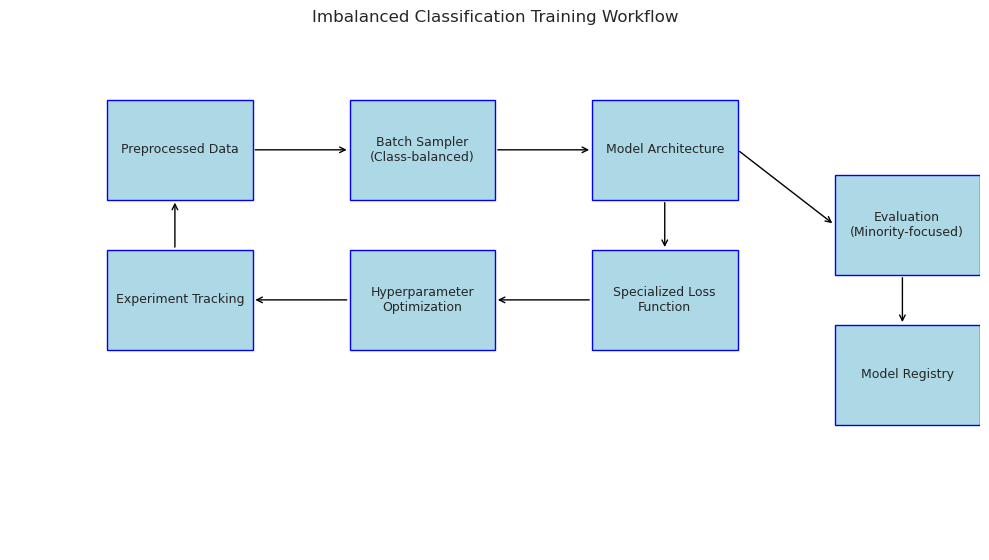

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure for the training workflow diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Define components and their positions
components = [
    {"name": "Preprocessed Data", "position": [0.1, 0.7, 0.15, 0.2]},
    {"name": "Batch Sampler\n(Class-balanced)", "position": [0.35, 0.7, 0.15, 0.2]},
    {"name": "Model Architecture", "position": [0.6, 0.7, 0.15, 0.2]},
    {"name": "Specialized Loss\nFunction", "position": [0.6, 0.4, 0.15, 0.2]},
    {"name": "Evaluation\n(Minority-focused)", "position": [0.85, 0.55, 0.15, 0.2]},
    {"name": "Hyperparameter\nOptimization", "position": [0.35, 0.4, 0.15, 0.2]},
    {"name": "Experiment Tracking", "position": [0.1, 0.4, 0.15, 0.2]},
    {"name": "Model Registry", "position": [0.85, 0.25, 0.15, 0.2]},
]

# Draw each component
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=9)

# Draw straight arrows
arrows = [
    {"start": [0.25, 0.8], "end": [0.35, 0.8]},   # Data to Sampler
    {"start": [0.5, 0.8], "end": [0.6, 0.8]},     # Sampler to Model
    {"start": [0.75, 0.8], "end": [0.85, 0.65]},  # Model to Evaluation
    {"start": [0.675, 0.7], "end": [0.675, 0.6]}, # Model to Loss
    {"start": [0.6, 0.5], "end": [0.5, 0.5]},     # Loss to Hyperparameter
    {"start": [0.35, 0.5], "end": [0.25, 0.5]},   # Hyperparameter to Tracking
    
    # FIXED: Experiment Tracking to Preprocessed Data (direct line)
    {"start": [0.17, 0.6], "end": [0.17, 0.7]},   # Tracking directly up to Data
    
    # FIXED: Evaluation to Model Registry (direct vertical connection)
    {"start": [0.92, 0.55], "end": [0.92, 0.45]}, # Evaluation to Registry (center-aligned)
]

# Draw arrows
for arrow in arrows:
    ax.annotate(
        '', xy=arrow["end"], xytext=arrow["start"],
        arrowprops=dict(arrowstyle='->', color='black')
    )

# Add title
plt.title('Imbalanced Classification Training Workflow', fontsize=12, pad=20)

# Clean up the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 3.3 Parameter Optimization Approach

Systematic hyperparameter optimization is critical for imbalanced classification, as standard configurations often favor the majority class. The proposed optimization approach balances performance on the minority class with computational efficiency.

### Multi-Phase Optimization Strategy

The parameter optimization process follows a staged approach:

1. **Exploratory Phase**:
   - Broad parameter space exploration using low-cost proxy tasks
   - Coarse grid search on dataset samples to identify promising regions
   - Early performance evaluation with focus on minority class recall

2. **Refinement Phase**:
   - Bayesian optimization within promising parameter regions
   - Progressive resource allocation to promising configurations
   - Cross-validation with stratified sampling to maintain class ratios

3. **Final Tuning Phase**:
   - Fine-grained optimization of top-performing configurations
   - Ensemble configuration evaluation
   - Stability testing across different random initializations

### Imbalance-Aware Evaluation Criteria

Parameter configurations are evaluated using metrics designed for imbalanced scenarios:

- Precision-Recall AUC (prioritized over standard ROC AUC)
- F-beta score with beta > 1 to emphasize recall
- Balanced accuracy and Matthews correlation coefficient
- Performance stability across different train-test splits

### Computational Efficiency Considerations

To optimize the parameter search process with 1M examples:

- Implement early stopping criteria based on minority class performance
- Use progressive resource allocation (train promising models longer)
- Leverage parallel evaluation of independent configurations
- Maintain a parameter importance registry to guide future searches

# 4. Evaluation Infrastructure

This section outlines a comprehensive evaluation framework designed specifically for imbalanced classification, ensuring reliable performance assessment despite the severe class imbalance challenge (3% positive class).

## 4.1 Metrics Selection Framework

When evaluating classification models with severe class imbalance (3% positive class), standard performance metrics can be misleading and inadequate for proper assessment.

### Limitations of Standard Accuracy

Standard accuracy is particularly problematic for imbalanced classification because:

- A naive model predicting all samples as negative would achieve 97% accuracy
- Improvements in minority class detection may show negligible impact on overall accuracy
- Accuracy fails to reflect the typically higher importance of correctly identifying the rare class

### Imbalance-Aware Metric Framework

The proposed framework selects metrics based on these key considerations:

1. **Class Distribution Sensitivity**: Metrics should remain meaningful despite severe imbalance
2. **Error Cost Awareness**: Capability to incorporate different misclassification costs
3. **Threshold Independence**: Performance assessment across decision thresholds
4. **Interpretability**: Clear meaning to stakeholders and researchers

### Recommended Metric Categories

**Primary Metrics:**
- Precision-Recall AUC: Focuses on minority class performance across thresholds
- F-beta Score: Weighted harmonic mean with adjustable emphasis on precision vs. recall
- Matthews Correlation Coefficient: Robust to class imbalance and dataset size

**Supporting Metrics:**
- Class-specific metrics (precision, recall, specificity)
- Balanced accuracy: Average of sensitivity and specificity
- Brier score: Measures probability calibration quality

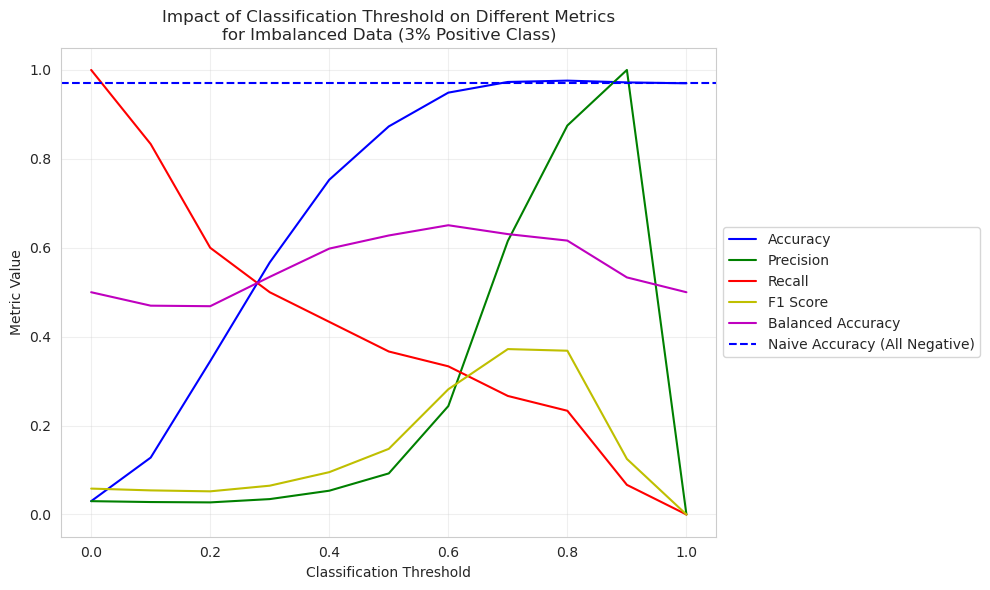

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample prediction scenario
np.random.seed(42)
y_true = np.array([0] * 970 + [1] * 30)  # 1000 samples with 3% positive class
y_pred_proba = np.random.beta(2, 5, size=1000)  # Probability predictions
y_pred_proba[980:990] = np.random.beta(5, 2, size=10)  # Make some positives have higher scores

# Calculate metrics at different thresholds
thresholds = np.linspace(0, 1, 11)
metrics = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # True positives, false positives, etc.
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Calculate various metrics
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    balanced_acc = (recall + tn / (tn + fp)) / 2 if (tn + fp) > 0 else recall
    
    metrics.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'balanced_acc': balanced_acc
    })

# Create the visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Extract metrics for plotting
thresholds = [m['threshold'] for m in metrics]
accuracy = [m['accuracy'] for m in metrics]
precision = [m['precision'] for m in metrics]
recall = [m['recall'] for m in metrics]
f1 = [m['f1'] for m in metrics]
balanced_acc = [m['balanced_acc'] for m in metrics]

# Plot the metrics
ax.plot(thresholds, accuracy, 'b-', label='Accuracy')
ax.plot(thresholds, precision, 'g-', label='Precision')
ax.plot(thresholds, recall, 'r-', label='Recall')
ax.plot(thresholds, f1, 'y-', label='F1 Score')
ax.plot(thresholds, balanced_acc, 'm-', label='Balanced Accuracy')

# Add a horizontal line at 0.97 (accuracy from predicting all negative)
ax.axhline(y=0.97, color='b', linestyle='--', label='Naive Accuracy (All Negative)')

# Add labels and legend
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Metric Value')
ax.set_title('Impact of Classification Threshold on Different Metrics\nfor Imbalanced Data (3% Positive Class)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Understanding the Metrics Visualization

**Standard Accuracy (Blue Line)**: While it stays high across all thresholds, notice it's very close to the dashed blue line (97%), showing why accuracy is misleading for imbalanced data.

**Precision (Green Line)**: Shows how certain we are that a positive prediction is correct. Increases as we raise the threshold but comes at a cost.

**Recall (Red Line)**: Shows our ability to find all positive cases. Dramatically decreases as the threshold increases, demonstrating how we miss minority cases.

**F1 Score (Yellow Line)**: Balances precision and recall, providing a more meaningful assessment for imbalanced data than accuracy alone.

**Balanced Accuracy (Purple Line)**: Accounts for both classes equally regardless of their size, providing a fairer assessment than standard accuracy.

## 4.2 Validation Process Design

For imbalanced datasets, traditional validation approaches often fail to provide reliable performance estimates, particularly for the minority class. A specialized validation framework is necessary to ensure model assessment accurately reflects performance on both classes.

### Stratified Data Splitting

To maintain class distribution integrity throughout the validation process:

- **Stratified Sampling**: Ensures the 3% positive class ratio is maintained in all data splits
- **Iterative Stratification**: Extended stratification technique for multi-label or multi-class scenarios
- **Conservative Validation**: Reserves sufficient minority class examples for meaningful testing

### Cross-Validation Strategy

For robust performance estimation with imbalanced data:

- **Stratified K-Fold Cross-Validation**: Preserves class distribution across all folds
- **Repeated Cross-Validation**: Multiple iterations with different random seeds to reduce variance
- **Leave-One-Out for Minority Class**: For extreme imbalance scenarios where minority examples are critical

### Temporal and Distribution Considerations

To address potential temporal patterns and distribution shifts:

- **Time-Based Validation**: For datasets where temporal patterns may exist
- **Distributionally Robust Validation**: Tests model on deliberately challenging distributions
- **Minority-Focused Subsampling**: Creates validation scenarios with varying levels of imbalance

## 4.3 Performance Analysis System

A comprehensive performance analysis system for imbalanced classification should focus specifically on understanding model behavior regarding the minority class while maintaining scalability for the large dataset.

### Multi-Level Analysis Framework

The proposed system operates at three complementary levels:

1. **Aggregate Performance Analysis**
   - Trend analysis of minority class metrics across experiments
   - Threshold optimization based on business-specific misclassification costs
   - Confidence interval calculation for reliability assessment

2. **Instance-Level Analysis**
   - Error stratification by feature characteristics
   - Confusion matrix analysis with emphasis on false negative patterns
   - Confidence scoring to identify boundary cases

3. **Feature-Level Analysis**
   - Feature importance analysis for minority class prediction
   - Interaction effect identification between features
   - Subgroup performance analysis across feature value ranges

### Interpretability Components

To understand model decision patterns:

- **Local Explanation Module**: Generates instance-level explanations for critical misclassifications
- **Global Pattern Detector**: Identifies systematic patterns in model errors
- **Feature Contribution Analyzer**: Quantifies feature impact on minority class predictions
- **Decision Boundary Visualizer**: Projects high-dimensional data to visualize classification boundaries

### Iterative Improvement Cycle

The analysis system supports model refinement through:

- Automated identification of minority class samples requiring focused attention
- Feedback mechanisms to inform data collection or augmentation strategies
- Performance comparison across model versions with statistical significance testing
- Hypothesis generation for targeted architecture modifications

# 5. Computing Environment Architecture

This section outlines the computing infrastructure required to support data processing, model development, and evaluation for the imbalanced classification task with 1M rows and 30 features.

## 5.1 Resource Allocation Strategy

A tailored resource allocation strategy is essential for efficiently managing computational resources throughout the ML lifecycle for this imbalanced classification task.

### Lifecycle-Based Allocation Framework

Different phases of the machine learning lifecycle have distinct resource requirements:

1. **Data Processing Phase**
   - Memory-intensive operations for the 1M row dataset
   - Batch processing capabilities for feature engineering
   - Storage optimization for preprocessed data versions

2. **Model Training Phase**
   - GPU acceleration for neural network training
   - Dynamic scaling during hyperparameter optimization
   - Resource isolation for reproducible experiments

3. **Evaluation Phase**
   - Parallel computing for cross-validation procedures
   - On-demand resources for performance analysis
   - Lightweight visualization and reporting environments

### Resource Prioritization Strategy

To maximize research productivity with finite resources:

- **Job Scheduling System**: Prioritizes experiments based on expected information gain
- **Resource Reservation**: Dedicates minimum resources to minority class performance evaluation
- **Tiered Allocation**: Applies progressive resource allocation based on initial experiment promise
- **Resource Pooling**: Shares computational capacity across workflow stages based on active needs

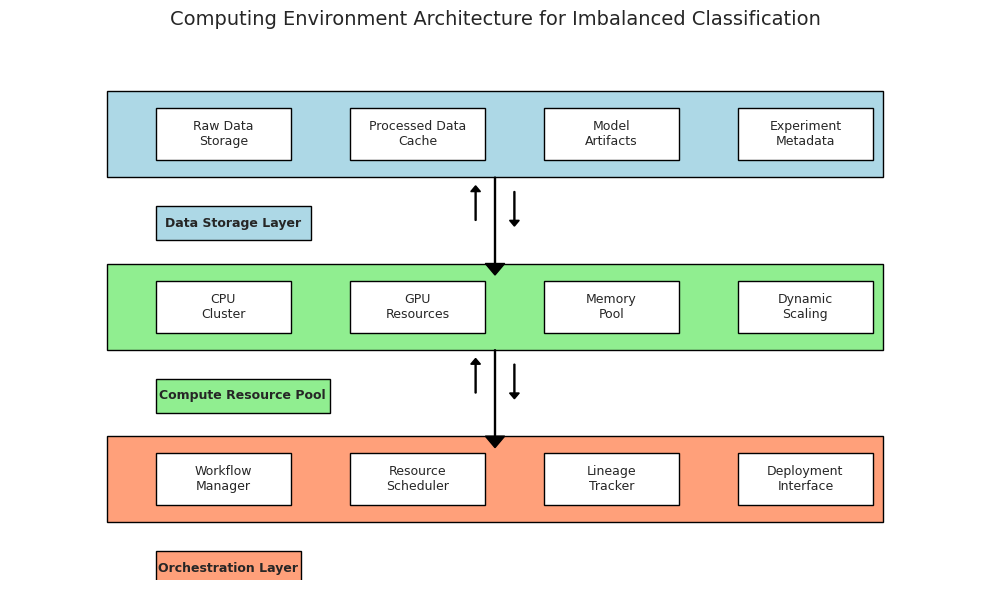

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(10, 6))

# Define main components with slightly wider width
components = [
    {"name": "Data Storage Layer", "position": [0.1, 0.7, 0.8, 0.15], "color": "lightblue"},
    {"name": "Compute Resource Pool", "position": [0.1, 0.4, 0.8, 0.15], "color": "lightgreen"},
    {"name": "Orchestration Layer", "position": [0.1, 0.1, 0.8, 0.15], "color": "lightsalmon"}
]

# Adjust subcomponents to be slightly narrower with better padding
subcomponents = [
    {"name": "Raw Data\nStorage", "position": [0.15, 0.73, 0.14, 0.09], "color": "white"},
    {"name": "Processed Data\nCache", "position": [0.35, 0.73, 0.14, 0.09], "color": "white"},
    {"name": "Model\nArtifacts", "position": [0.55, 0.73, 0.14, 0.09], "color": "white"},
    {"name": "Experiment\nMetadata", "position": [0.75, 0.73, 0.14, 0.09], "color": "white"},
    
    {"name": "CPU\nCluster", "position": [0.15, 0.43, 0.14, 0.09], "color": "white"},
    {"name": "GPU\nResources", "position": [0.35, 0.43, 0.14, 0.09], "color": "white"},
    {"name": "Memory\nPool", "position": [0.55, 0.43, 0.14, 0.09], "color": "white"},
    {"name": "Dynamic\nScaling", "position": [0.75, 0.43, 0.14, 0.09], "color": "white"},
    
    {"name": "Workflow\nManager", "position": [0.15, 0.13, 0.14, 0.09], "color": "white"},
    {"name": "Resource\nScheduler", "position": [0.35, 0.13, 0.14, 0.09], "color": "white"},
    {"name": "Lineage\nTracker", "position": [0.55, 0.13, 0.14, 0.09], "color": "white"},
    {"name": "Deployment\nInterface", "position": [0.75, 0.13, 0.14, 0.09], "color": "white"}
]

# Draw main components
for i, comp in enumerate(components):
    rect = patches.Rectangle((comp["position"][0], comp["position"][1]), 
                            comp["position"][2], comp["position"][3],
                            linewidth=1, edgecolor='black', facecolor=comp["color"])
    ax.add_patch(rect)

# Draw subcomponents with better spacing
for comp in subcomponents:
    rect = patches.Rectangle((comp["position"][0], comp["position"][1]), 
                            comp["position"][2], comp["position"][3],
                            linewidth=1, edgecolor='black', facecolor=comp["color"])
    ax.add_patch(rect)
    ax.text(comp["position"][0] + comp["position"][2]/2, 
           comp["position"][1] + comp["position"][3]/2,
           comp["name"], ha='center', va='center', fontsize=9)

# Position titles aligned with left edge of components
title_dimensions = [
    {"width": 0.16, "height": 0.06, "color": "lightblue"},     # Data Storage Layer
    {"width": 0.18, "height": 0.06, "color": "lightgreen"},    # Compute Resource Pool
    {"width": 0.15, "height": 0.06, "color": "lightsalmon"}    # Orchestration Layer
]

# Add component titles properly aligned with component boxes
for i, comp in enumerate(components):
    # Position title at left edge of component area
    pos_x = comp["position"][0] + 0.05
    
    if i == 0:  # Data Storage Layer
        pos_y = 0.62
    elif i == 1:  # Compute Resource Pool
        pos_y = 0.32  
    else:  # Orchestration Layer
        pos_y = 0.02
        
    width = title_dimensions[i]["width"]
    height = title_dimensions[i]["height"]
    
    rect = patches.Rectangle((pos_x, pos_y-0.03), width, height,
                           linewidth=1, edgecolor='black', facecolor=title_dimensions[i]["color"])
    ax.add_patch(rect)
    
    ax.text(pos_x + width/2, pos_y, components[i]["name"], 
            ha='center', va='center', fontsize=9, fontweight='bold')

# Add arrows connecting the layers
ax.arrow(0.5, 0.7, 0, -0.15, head_width=0.02, head_length=0.02, fc='black', ec='black')
ax.arrow(0.5, 0.4, 0, -0.15, head_width=0.02, head_length=0.02, fc='black', ec='black')

# Add bidirectional arrows
ax.arrow(0.48, 0.625, 0, 0.05, head_width=0.01, head_length=0.01, fc='black', ec='black')
ax.arrow(0.52, 0.675, 0, -0.05, head_width=0.01, head_length=0.01, fc='black', ec='black')
ax.arrow(0.48, 0.325, 0, 0.05, head_width=0.01, head_length=0.01, fc='black', ec='black')
ax.arrow(0.52, 0.375, 0, -0.05, head_width=0.01, head_length=0.01, fc='black', ec='black')

# Clean up the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.95)
ax.axis('off')
plt.title('Computing Environment Architecture for Imbalanced Classification', fontsize=14)
plt.tight_layout()
plt.show()

## 5.2 Scaling Methodology

The computing environment must scale effectively to handle the 1M row dataset with 30 features while maintaining reproducibility and providing sufficient resources for handling class imbalance challenges.

### Horizontal vs. Vertical Scaling

The proposed architecture supports both scaling approaches with specific considerations:

- **Vertical Scaling (Scale-Up)**
  - Suitable for memory-intensive preprocessing of the 1M row dataset
  - Enables efficient single-node training for baseline models
  - Simplifies reproducibility through environment consistency
  - Limited by hardware constraints for extremely large experiments

- **Horizontal Scaling (Scale-Out)**
  - Enables parallel processing for hyperparameter optimization
  - Distributes cross-validation workloads across multiple nodes
  - Supports ensemble learning approaches for imbalanced classification
  - Requires additional coordination to maintain reproducibility

### Parallelization Framework

The system implements multiple levels of parallelism to efficiently handle the dataset:

1. **Data Parallelism**: Distributes training batches across compute resources
2. **Model Parallelism**: Splits large model architectures across devices
3. **Experiment Parallelism**: Runs multiple configurations simultaneously
4. **Pipeline Parallelism**: Overlaps data preprocessing with model training

### Reproducibility Safeguards

Scaling introduces reproducibility challenges that are addressed through:

- Consistent environment containerization across compute nodes
- Synchronized random seed management for distributed processes
- Version-controlled configuration for all distributed components
- Deterministic operation enforcement where computationally feasible

## 5.3 System Integration Approach

The proposed system integration approach connects the various components into a cohesive architecture that enables efficient workflow orchestration while maintaining data and model lineage throughout the process.

### Component Integration Strategy

The architecture follows a modular integration pattern with:

- **Decoupled Components**: Individual subsystems communicate through standardized interfaces
- **Message-Based Coordination**: Asynchronous communication between system components
- **Shared State Management**: Centralized tracking of experiment and data states
- **Integration Layer**: Middleware that connects specialized components

### Workflow Orchestration

To coordinate the end-to-end machine learning process:

- **Directed Acyclic Graph (DAG) Workflows**: Represent dependencies between processing steps
- **Parameterized Templates**: Enable reproducible execution of standard workflows
- **Conditional Execution Paths**: Adapt processing based on data characteristics
- **Failure Recovery Mechanisms**: Gracefully handle interruptions while preserving state

### Lineage Tracking

For reproducibility and auditability:

- **Immutable Data Versioning**: Preserves dataset states throughout transformations
- **Metadata Registry**: Tracks relationships between data, parameters, and results
- **Artifact Provenance**: Records origins and transformations of all system artifacts
- **Configuration Versioning**: Maintains complete environment specifications

### Deployment Considerations

The trained models can be deployed through:

- **Model Serving Interface**: Standardized API for prediction requests
- **Batch Inference Pipeline**: For large-scale application of the model
- **Monitoring Framework**: Tracks model performance in production
- **Retraining Triggers**: Mechanisms to update models as new data becomes available

## 6. Conclusions and Recommendations

### 6.1 Technology Stack Summary

The proposed system leverages these core technologies to address the 3% positive class challenge:

**Deep Learning Frameworks**
- **TensorFlow** - Production-ready framework with built-in class weighting support ([Documentation](https://www.tensorflow.org/))
- **PyTorch** - Research-friendly framework with flexible loss function implementation ([Documentation](https://pytorch.org/docs/stable/index.html))

**Imbalanced Data Techniques**
- **SMOTE** - Generates synthetic minority class samples 
- **Focal Loss** - Focuses learning on hard-to-classify examples
- **Class Weighting** - Adjusts loss based on class frequencies ([scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html))

**Evaluation Tools**
- **Precision-Recall Curves** - Better than ROC for imbalanced data
- **AUPRC** - Single metric for model comparison
- **Confusion Matrices** - Per-class performance analysis

**Infrastructure**
- **HPC Scheduling** - SLURM/PBS for distributed training ([SLURM docs](https://slurm.schedmd.com/documentation.html))
- **Docker** - Reproducible environments ([NVIDIA Container Toolkit](https://docs.nvidia.com/datacenter/cloud-native/container-toolkit/latest/install-guide.html))
- **DVC** - Version control for 1M-row datasets ([Documentation](https://dvc.org/doc))
- **MLflow** - Experiment tracking and comparison ([Documentation](https://mlflow.org/docs/latest/index.html))

These technologies work together: models train on SMOTE-balanced data using focal loss, evaluate with precision-recall metrics, and run efficiently on HPC infrastructure with full reproducibility.

### 6.2 Strategic Approach for Research Success

This systematic methodology empowers researchers to tackle the 3% positive class challenge through clear, proven pathways:

**Structured Problem Decomposition**
- Start with baseline metrics to understand the severity of imbalance
- Progress through algorithmic solutions (SMOTE, cost-sensitive learning)
- Advance to architectural innovations (focal loss, ensemble methods)
- Each stage builds on previous insights, reducing technical uncertainty

**Technical Confidence Building**
- Pre-configured pipelines eliminate guesswork in handling imbalanced data
- Validated hyperparameter ranges prevent wasted experimentation
- Clear evaluation protocols using AUPRC ensure meaningful progress tracking
- Modular architecture allows controlled experimentation without system-wide risks

**Research Excellence Framework**
- Systematic approach transforms a daunting 97/3 split into manageable challenges
- Researchers can focus on domain-specific insights rather than algorithmic troubleshooting
- Built-in best practices prevent common pitfalls (data leakage, improper validation)
- Progressive complexity allows natural skill development alongside research progress

**Innovation Enablement**
- Foundation supports advanced techniques as expertise grows
- Architecture accommodates novel sampling strategies and custom loss functions
- Infrastructure scales from proof-of-concept to production-ready models
- Clear pathways from initial exploration to publication-quality results

This methodology transforms the imbalanced classification challenge from an obstacle into an opportunity for rigorous computational research, providing researchers with the tools and confidence to pursue meaningful contributions to their field.

### 6.3 Research Methodology and Reproducibility Framework

**Scalability Architecture for 1M Rows**
- Distributed data preprocessing using Dask ([Dask ML documentation](https://ml.dask.org/)) or Ray ([Ray Data Guide](https://docs.ray.io/en/latest/data/data.html))
- Stratified sampling strategies that preserve class distributions ([imbalanced-learn sampling](https://imbalanced-learn.org/stable/references/under_sampling.html))
- Batch processing pipelines optimized for memory efficiency ([TensorFlow data pipeline](https://www.tensorflow.org/guide/data))
- Checkpoint mechanisms for resumable training ([PyTorch checkpointing](https://docs.pytorch.org/docs/stable/checkpoint.html))

**Experimental Design Standards**
- Cross-validation protocols specifically designed for imbalanced data ([StratifiedKFold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html))
- Proper train/validation/test splits maintaining class distributions ([train_test_split with stratify](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
- Systematic hyperparameter search using Bayesian optimization ([Optuna framework](https://optuna.readthedocs.io/))
- Statistical significance testing adapted for imbalanced metrics ([Statistically Significant, Explained
](https://www.statsig.com/perspectives/statistically-significant-explained#:~:text=Applying%20statistical%20significance%20effectively%20starts%20with%20selecting,and%20the%20type%20of%20data%20you're%20analyzing.))

**Version Control and Data Lineage**
- GitHub for comprehensive code versioning - the world's largest social coding platform ([GitHub Docs](https://docs.github.com/))
- DVC integration for versioning 1M-row datasets and model artifacts ([DVC with GitHub](https://dvc.org/doc/use-cases/versioning-data-and-models))
- Automated logging of data transformations ([Prefect documentation](https://docs.prefect.io/))
- Complete audit trails using data versioning ([LakeFS for data versioning](https://docs.lakefs.io/))

**Experiment Tracking Framework**
- MLflow for comprehensive experiment logging ([MLflow Tracking](https://www.mlflow.org/docs/latest/tracking.html))
- Weights & Biases for real-time monitoring ([W&B Experiment Tracking](https://docs.wandb.ai/guides/track))
- Reproducible random seeds management ([NumPy random state](https://numpy.org/doc/stable/reference/random/generator.html))
- Containerized environments using Docker ([Docker Best Practices](https://docs.docker.com/develop/dev-best-practices/))

**Community Standards Compliance**
- ML reproducibility checklists ([Papers with Code Guidelines](https://paperswithcode.com/about))
- FAIR data principles implementation ([FAIR Principles](https://www.go-fair.org/fair-principles/))
- Configuration management with Hydra ([Hydra framework](https://hydra.cc/docs/intro/))
- Performance benchmarking protocols ([MLPerf standards](https://mlcommons.org/en/mlperf/))

This framework ensures that every experimental decision is traceable, every result is reproducible, and the entire research process meets the highest standards of computational rigor while efficiently handling the scale challenges of 1M rows with 3% positive class.

### 6.4 Key Recommendations

**1. Implement Stratified Data Pipeline**
- Deploy Dask ([Dask ML documentation](https://ml.dask.org/)) or Ray ([Ray Data Guide](https://docs.ray.io/en/latest/data/data.html)) for distributed preprocessing
- Use stratified sampling with scikit-learn ([StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html))
- Implement SMOTE within CV folds ([imbalanced-learn pipeline](https://imbalanced-learn.org/stable/auto_examples/pipeline/plot_pipeline_classification.html))
- Cache data using HDF5 ([h5py documentation](https://docs.h5py.org/)) or Parquet ([PyArrow Parquet](https://arrow.apache.org/docs/python/parquet.html))

**2. Adopt Hybrid Sampling-Algorithm Approach**
- Start with class weighting baseline ([compute_class_weight](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html))
- Configure SMOTE parameters ([SMOTE documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html))
- Implement focal loss ([focal-loss GitHub](https://github.com/artemmavrin/focal-loss)) or ([focal-loss PyTorch](https://github.com/clcarwin/focal_loss_pytorch))
- Use RepeatedStratifiedKFold for validation ([scikit-learn guide](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html))

**3. Establish Rigorous Evaluation Protocol**
- Calculate AUPRC with scikit-learn ([average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html))
- Generate precision-recall curves ([precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html))
- Implement early stopping ([Keras EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping))
- Bootstrap confidence intervals ([scipy.stats.bootstrap](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html))

**4. Build Scalable Infrastructure**
- Configure Docker with NVIDIA support ([NVIDIA Container Toolkit](https://docs.nvidia.com/datacenter/cloud-native/container-toolkit/install-guide.html))
- Set up SLURM job arrays ([SLURM Array Jobs](https://slurm.schedmd.com/job_array.html)) or PBS arrays ([PBS Professional](https://www.openpbs.org/))
- Deploy MLflow server ([MLflow Deployment](https://www.mlflow.org/docs/latest/tracking.html#tracking-server))
- Implement pytest for pipeline testing ([pytest documentation](https://docs.pytest.org/))

**5. Create Reproducibility Framework**
- Structure GitHub repository ([GitHub Best Practices](https://docs.github.com/en/repositories/creating-and-managing-repositories/best-practices-for-repositories))
- Configure GitHub Actions CI/CD ([Actions Quickstart](https://docs.github.com/en/actions/quickstart))
- Use Sacred for experiment configuration ([Sacred documentation](https://sacred.readthedocs.io/))
- Create notebooks with Papermill ([Papermill docs](https://papermill.readthedocs.io/))

These recommendations provide a comprehensive implementation roadmap with direct links to documentation, ensuring efficient navigation of the 3% positive class challenge.

## 7. Core Technology Components for Implementation

### Introduction

The original hypothetical implementation plan has been replaced with a shortlist of core components valuable for learning. These components are optional and may or may not be implemented. If implementation proceeds, it will occur in a new repository on a standalone branch - I will attempt to update this document with the repository URL if created.

These components represent pathways to deeper technical learning for researchers seeking to understand the mathematical and algorithmic principles underlying imbalanced classification workflows.

### Core Components List

The following essential components are proposed for implementation to build deep expertise in imbalanced classification:

| Component | Purpose | Implementation Value | Status |
|-----------|---------|---------------------|---------|
| **Data Sampling Techniques** | Implement SMOTE, ADASYN, and Borderline-SMOTE from scratch | Deep understanding of synthetic data generation for minority classes | ⬜ |
| **Custom Loss Functions** | Build focal loss, class-balanced loss, and cost-sensitive loss functions | Master mathematical foundations of imbalanced learning optimization | ⬜ |
| **Evaluation Metrics** | Create precision-recall analysis, AUPRC calculation, and threshold selection | Understand proper evaluation methodologies for imbalanced datasets | ⬜ |
| **Ensemble Methods** | Implement Balanced Bagging, EasyEnsemble, and BalanceCascade | Learn how ensemble approaches address class imbalance challenges | ⬜ |

**Status Key:** ⬜ Not Started | 🟨 In Progress | ✅ Implemented

**Implementation Note:** These components are proposed for potential future implementation. Should implementation proceed, development will occur in a dedicated repository with component-specific branches. Repository location will be documented here if available.